In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import cv2
import itertools
from skimage import io
import random
from pathlib import Path
from random import randint
from volumentations import *
import nibabel as nib
import matplotlib.pyplot as plt
import pickle
from imports import *
import pandas as pd

#input_path = '/home/cpabalan/brainlabs_cp/final_brainlabs/data/input_files/'
#target_path = '/home/cpabalan/brainlabs_cp/final_brainlabs/data/target_files/'

This is where the names of the data is located this is just file names that were split into input and output files The target files have seg in the name

In [2]:
input_path = '/home/jott2/brainlabs/data/input_files'
target_path = '/home/jott2/brainlabs/data/target_files'
from os import walk

inputs = []
input_file_path=[]
target_file_path=[]
for dirpath, dirnames, filenames in walk(input_path):
    inputs.extend(filenames)
    break
targets = []
for dirpath, dirnames, filenames in walk(target_path):
    targets.extend(filenames)
    break
for i in inputs:
    input_file_path.append(input_path+'/'+i)
for i in targets:
    target_file_path.append(target_path+'/'+i)
print(len(inputs))
print(len(targets))
print(len(input_file_path))
print(len(target_file_path))

1648
1676
1648
1676


In [3]:
print(input_file_path[0])
print(inputs[0])

/home/jott2/brainlabs/data/input_files/sub-ADNI002S0685_ses-M72_T1w.nii
sub-ADNI002S0685_ses-M72_T1w.nii


Here I am looking for unique id's 

In [4]:
input_ids=[]
target_ids=[]
gz_count=0
for i in inputs:
    #print(i.split('.')[0])
    input_ids.append(i.split('.')[0])
    if(i.split('.')[-1]=='gz'):
        gz_count+=1
    
for i in targets:
    #print(i.split('.')[0][:-4])
    target_ids.append(i.split('.')[0][:-4])


In [5]:
len(list(set(input_ids)&set(target_ids)))

1648

#  ^^Total records to work with!!!

# There are both nii files and gz files in this dataset, how do we handle the GZ files?

# I unziped them all using the gunzip *.gz commands

In [6]:
file_idx = 7
inp = nib.load(f'/home/cpabalan/brainlabs_cp/final_brainlabs/data/input_files/{inputs[file_idx]}').get_fdata()
inp.shape

(182, 218, 182)

Testing to see if it works!

In [7]:
import matplotlib.pyplot as plt 

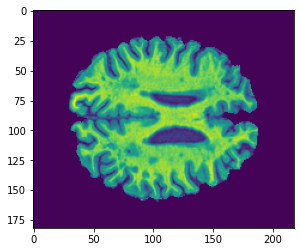

-24.870874404907227
2253.40576171875
22035990.173863888


In [8]:
data=inp[:,:,100]
plt.imshow(data)
plt.show()
print(data.min())
print(data.max())
print(data.sum())

In [9]:
from numpy import linspace
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
data=[]
for i in range(10):
    data.append(inp[:,:,100+i])

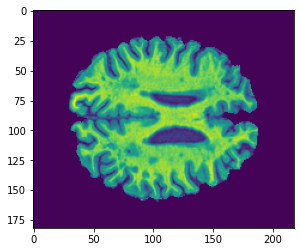

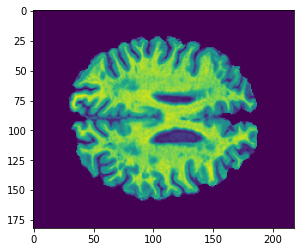

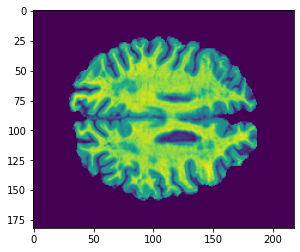

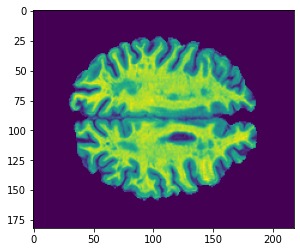

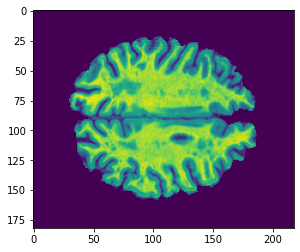

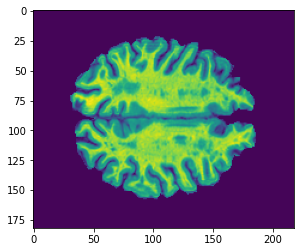

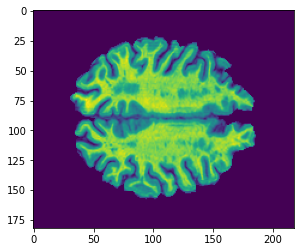

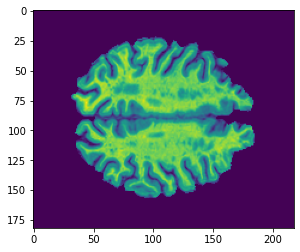

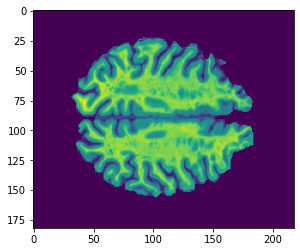

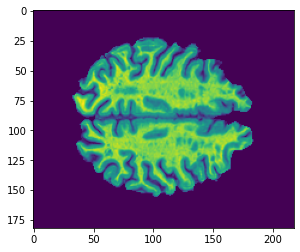

In [11]:
for i in range(len(data)):
    plt.imshow(data[i])
    plt.show()

# Here I am going to make a central dataframe with all file paths 

In [12]:
data = pd.read_csv('/home/cpabalan/brainlabs_cp/final_brainlabs/data/ADNIMERGE.csv', low_memory=False)

In [13]:
df=pd.read_csv('/home/jott2/brainlabs/data/cleaned_df_4_13.csv') #This is the pre-cleaned data 

In [14]:
df['filenames']

0       sub-ADNI100S0006_ses-M06_T1w
1       sub-ADNI100S0006_ses-M12_T1w
2       sub-ADNI100S0006_ses-M18_T1w
3       sub-ADNI100S0006_ses-M36_T1w
4       sub-ADNI100S0015_ses-M12_T1w
                    ...             
1638    sub-ADNI068S4431_ses-M84_T1w
1639    sub-ADNI018S2133_ses-M96_T1w
1640    sub-ADNI116S4855_ses-M72_T1w
1641    sub-ADNI011S4278_ses-M84_T1w
1642    sub-ADNI051S5285_ses-M48_T1w
Name: filenames, Length: 1643, dtype: object

In [15]:
input_file_names=[]
for i in inputs:
    input_file_names.append(i.split('.')[0])

In [16]:
target_file_names=[]
for i in targets:
    target_file_names.append(i.split('.')[0])

In [17]:
target_ids

['sub-ADNI018S0425_ses-M06_T1w',
 'sub-ADNI019S5012_ses-M12_T1w',
 'sub-ADNI073S4443_ses-M48_T1w',
 'sub-ADNI027S5109_ses-M24_T1w',
 'sub-ADNI012S5213_ses-M24_T1w',
 'sub-ADNI137S0722_ses-M18_T1w',
 'sub-ADNI024S4169_ses-M72_T1w',
 'sub-ADNI021S4558_ses-M12_T1w',
 'sub-ADNI123S1300_ses-M24_T1w',
 'sub-ADNI011S4949_ses-M12_T1w',
 'sub-ADNI041S4051_ses-M72_T1w',
 'sub-ADNI031S0867_ses-M84_T1w',
 'sub-ADNI128S0770_ses-M36_T1w',
 'sub-ADNI018S0087_ses-M18_T1w',
 'sub-ADNI128S2045_ses-M48_T1w',
 'sub-ADNI068S4431_ses-M84_T1w',
 'sub-ADNI135S4489_ses-M48_T1w',
 'sub-ADNI032S1169_ses-M36_T1w',
 'sub-ADNI032S0214_ses-M24_T1w',
 'sub-ADNI068S0127_ses-M24_T1w',
 'sub-ADNI035S4784_ses-M24_T1w',
 'sub-ADNI024S5054_ses-M12_T1w',
 'sub-ADNI011S1080_ses-M48_T1w',
 'sub-ADNI031S1066_ses-M24_T1w',
 'sub-ADNI126S4514_ses-M48_T1w',
 'sub-ADNI021S0647_ses-M12_T1w',
 'sub-ADNI128S0205_ses-M144_T1w',
 'sub-ADNI029S4279_ses-M24_T1w',
 'sub-ADNI018S0450_ses-M24_T1w',
 'sub-ADNI073S4360_ses-M48_T1w',
 'sub-ADN

# Here i am adding file paths to cleaned data 

In [18]:
df['input_file_path']=""
df['target_file_path']=""

In [19]:
for i,name in enumerate(df['filenames']):
    #print(i,name)
    df.loc[i,'input_file_path']=input_file_path[input_file_names.index(name)]
    df.loc[i,'target_file_path']=target_file_path[target_ids.index(name)]

# Here I was testing the quality of different file types 

/home/jott2/brainlabs/data/input_files/sub-ADNI100S0006_ses-M36_T1w.nii


True

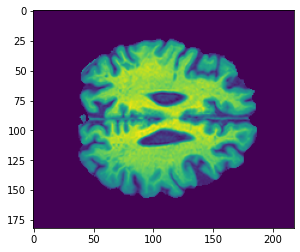

In [21]:
print(df['input_file_path'][3])
inp = nib.load(df['input_file_path'][3]).get_fdata()
inp.shape
plt.imshow(inp[:,:,100])
plt.savefig('vibecheck.png')
#imsave('vibing.tif',inp[:,:,100])
cv2.imwrite('vibe.png',inp[:,:,100].astype(np.uint16))

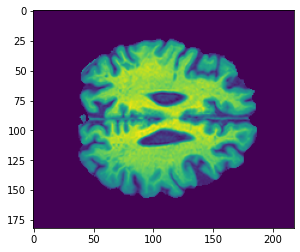

In [22]:
import skimage.io as skio
import matplotlib.image as mpimg
img = skio.imread('vibing.tif')
plt.imshow(img) 
plt.show()

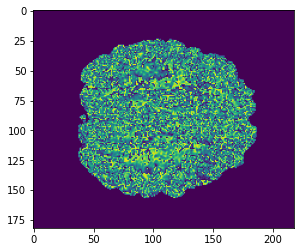

In [23]:
img = mpimg.imread('vibe.png')
plt.imshow(img)
plt.show()

In [69]:
len(df['target_file_path'].unique())

1643

# We have now a fully fledged data frame with file paths, need to partition it into indiviual files

[X, :, :] -sagittal

[:, X, :] - Coronal

[:, :, X] - Horizontal


<class 'numpy.memmap'>
582


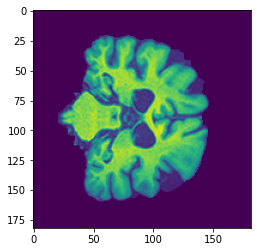

In [24]:
inp = nib.load(df['input_file_path'][3]).get_fdata()
print(type(inp))
print(sum(inp.shape))
plt.imshow(inp[:,100,:])
#plt.savefig('vibecheck.png')

First I need to make all the file paths to call

In [25]:
inp.shape

(182, 218, 182)

In [26]:
df['target_file_path'][0]

'/home/jott2/brainlabs/data/target_files/sub-ADNI100S0006_ses-M06_T1w_seg.nii'

In [28]:
#df.to_pickle('ALL_DATA.pkl')

In [29]:
check=pd.read_pickle('ALL_DATA.pkl')

In [31]:
!pwd

/home/jott2/brainlabs


# HERE I Create the file Destinations should make this its own notebook

In [26]:
def make_folders():
    path1='/home/jott2/brainlabs/2D_Files/sagittal'
    for i in range(inp.shape[0]):
        os.mkdir(path1+'/'+str(i))
    path2='/home/jott2/brainlabs/2D_Files/coronal'
    for i in range(inp.shape[1]):
        os.mkdir(path2+'/'+str(i))
        path3='/home/jott2/brainlabs/2D_Files/horizontal'
    for i in range(inp.shape[2]):
        os.mkdir(path3+'/'+str(i))
    return

In [64]:
import numpy as np
from tifffile import imsave
from skimage import io


def add_pngs(file_in,file_target,output_loc_non_seg='/home/jott2/brainlabs/2D_Files/data/input', output_loc_seg='/home/jott2/brainlabs/2D_Files/data/target' ):
    """ Take 3D .nii file path breaks it into 582  different  png  and adds it to the /home/jott2/brainlabs/2D_Files/Data input and output folders """
    my_file_in = Path(output_loc_non_seg)
    my_file_out = Path(output_loc_seg)
    
    inp = nib.load(file_in).get_fdata() #Read inputfile 
    out = nib.load(file_target).get_fdata() #Read in target file location 
    
    file_name=file_in.split('.')[0]
    file_name=file_name.split('/')[-1]
    
    for i in range(inp.shape[0]): #Saggital slices of brain
        sag_slice_in=inp[i,:,:]
        sag_slice_out=out[i,:,:]
        
        in_file_name=output_loc_non_seg+'/'+file_name + str(i)+'XX' +'.tif' #paths 
        tar_file_name=output_loc_seg+'/'+file_name + "_seg" +str(i)+'XX' +'.tif' #paths 
        
        my_file = Path(in_file_name)
        if my_file.is_file():
            continue
        else:
            imsave(in_file_name,sag_slice_in)
            
            
        my_file = Path(tar_file_name)
        if my_file.is_file():
            continue
        else:
            imsave(tar_file_name,sag_slice_out)
        
    
    for i in range(inp.shape[1]):#coronal slices of brain
        cor_slice_in=inp[:,i,:]
        cor_slice_out=out[:,i,:]
        
        in_file_name=output_loc_non_seg+'/'+file_name +'X' + str(i)+'X' +'.tif' #paths 
        tar_file_name=output_loc_seg+'/'+file_name + "_seg" +'X'+str(i)+'X' +'.tif' #paths 
        
        my_file = Path(in_file_name)
        if my_file.is_file():
            continue
        else:
            imsave(in_file_name,cor_slice_in)
        
            
        my_file = Path(tar_file_name)
        if my_file.is_file():
            continue   
        else:
            imsave(tar_file_name,cor_slice_out)

    for i in range(inp.shape[2]):#Horizontal  slices of brain
        hor_slice_in=inp[:,:,i]
        hor_slice_out=out[:,:,i]
        
        in_file_name=output_loc_non_seg+'/'+file_name + 'XX' +str(i)+'.tif' #paths 
        tar_file_name=output_loc_seg+'/'+file_name + "_seg" +'XX'+str(i) +'.tif' #paths 
        
        my_file = Path(in_file_name)
        if my_file.is_file():
            continue
        else:
            imsave(in_file_name,hor_slice_in)
        
        my_file = Path(tar_file_name)
        if my_file.is_file():
            continue
        else:
             imsave(tar_file_name,hor_slice_out)
            
            
            

In [65]:
#for i in range(len(df)):
#    x=df['input_file_path'][i]
#    x1=df['target_file_path'][i]
#    add_pngs(x,x1)
#    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Now for the vizualization

,AGE,PTEDUCAT,APOE4,ADAS11,MMSE,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,...,PTGENDER_Male,PTGENDER_nan,PTMARRY_Divorced,PTMARRY_Married,PTMARRY_Never married,PTMARRY_Unknown,PTMARRY_Widowed,PTMARRY_nan,input_file_path,target_file_path
0,80.4,13,0.0,19.00,21,40165,5542,957221,2480,18458,...,0,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
1,80.4,13,0.0,18.67,26,40165,5542,957221,2480,18458,...,0,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
2,80.4,13,0.0,11.33,24,40165,5542,957221,2480,18458,...,0,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
3,80.4,13,0.0,17.67,22,40165,5542,957221,2480,18458,...,0,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
4,80.8,18,1.0,6.67,27,32392,6591,1044610,3387,16870,...,1,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,74.1,16,0.0,13.33,27,42952,6591,1009645,3387,16870,...,1,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
1639,62.5,18,2.0,35.67,22,42952,6591,1009645,3387,16870,...,0,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
1640,83.8,14,1.0,10.67,28,42952,6591,1009645,3387,16870,...,1,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
1641,75.0,14,1.0,21.33,24,42952,6591,1009645,3387,16870,...,1,0,0,1,0,0,0,0,/home/jott2/brainlabs/data/input_files/sub-ADN...,/home/jott2/brainlabs/data/target_files/sub-AD...
